Create a Linear Regression Model using Python/R to predict home prices

using Boston Housing Dataset. Find the performance of your model.

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
df.shape

(501, 14)

In [29]:
# data preprocessing / cleaning

df.isnull().sum()
# no null
# df.describe()
rm = df[df.isnull().any(axis = 1)]
rm
df = df.dropna()
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# splitting the data into x and y
# x has all except MEDV, X has independent vairables RM, LSTAT, PTRATIO
x = df.drop('medv', axis=1)
x
# y is target dependent variable which has MEDV
y = df['medv']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
# test_size = 0.3 mhanje data is split 70 and 30%
# where 70& for training and 30% for testing
# randomstate = when training the model again if the value of randomstate is changed u might get 
# different results so we pput that value and use the samme again for same results


# training linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)
import math
# evaluate the modmel
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean squared error : {mse.round(2)}")
print(f"R-sqaured error : {r2.round(2)}")
print(f"RMSE  : {rmse}")

Mean squared error : 20.69
R-sqaured error : 0.72
RMSE  : 4.548375586189921


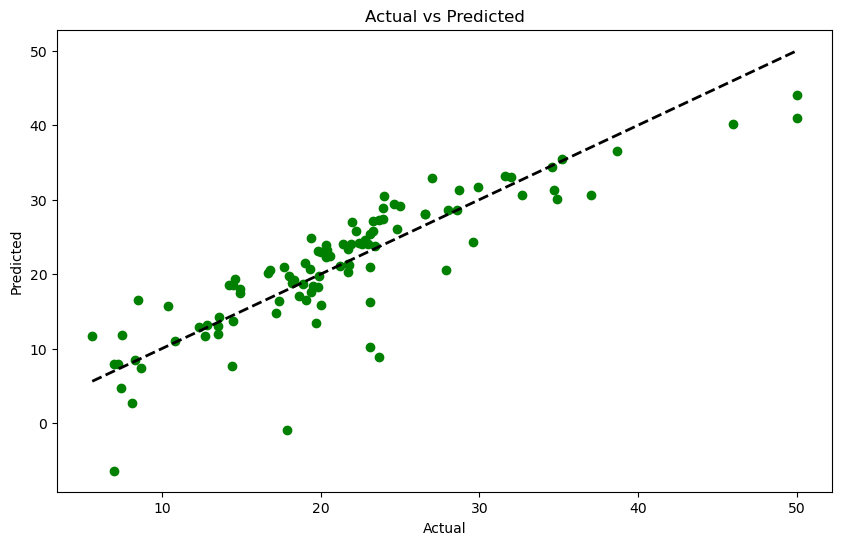

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [60]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

# Print the DataFrame
results

,Actual,Predicted
367,23.1,10.182964
76,20.0,22.900286
380,10.4,15.725071
160,27.0,32.868743
108,19.8,23.063055
...,...,...
89,28.7,31.264455
78,21.2,21.147828
444,10.8,11.049278
16,23.1,21.003597


In [62]:
# for showing our predictions is working oii mean model is working
# new_input = pd.DataFrame({
#     'crim': [0.00632],
#     'zn': [18.0],
#     'indus': [2.31],
#     'chas': [0],
#     'nox': [0.538],
#     'rm': [6.575],
#     'age': [65.2],
#     'dis': [4.0900],
#     'rad': [1],
#     'tax': [296],
#     'ptratio': [15.3],
#     'b': [396.90],
#     'lstat': [4.98]
# })

# new_predictions = model.predict(new_input)
# print(new_predictions)


[30.41900005]
